In [1]:
#Data Wrangling, currently working on making this a git repository, before starting
import pandas as pd



In [2]:
#steam data, has hours played, note 1 = purchase
steam_data = pd.read_csv(r"C:\Users\ez\Desktop\Capstone2\csv_files\steam-200k.csv", names = ['UserID', 'Game', 'Purchase/Play', 'Hours', '0'])
steam_data.head()

,UserID,Game,Purchase/Play,Hours,0
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,purchase,1.0,0


In [3]:
#Dropping Last column: just 0's
steam_data.drop('0', axis=1, inplace = True)
steam_data.head()

,UserID,Game,Purchase/Play,Hours
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
1,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,purchase,1.0
3,151603712,Fallout 4,play,87.0
4,151603712,Spore,purchase,1.0


In [4]:
#looked at .describe(), however note all "purchase" actions are marked as 1 in the "hours" so this is causing a skew in our data, so we need to filter
steam_data_play = steam_data[steam_data['Purchase/Play']=='play']
print(steam_data_play['Hours'].describe())
print(steam_data_play['Hours'].isna().sum())

count    70489.000000
mean        48.878063
std        229.335236
min          0.100000
25%          1.000000
50%          4.500000
75%         19.100000
max      11754.000000
Name: Hours, dtype: float64
0


<AxesSubplot:>

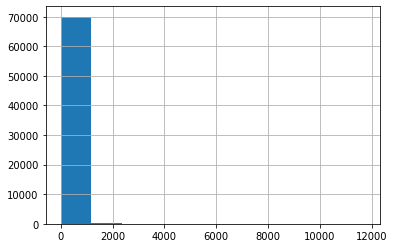

In [5]:
#No null values in games with the "play function"
steam_data_play['Hours'].hist()
# Note there appears to be a strong outlier in the data to look into more in exploritory data. 
# Also note 25% of the data is less than 1 hour of play time


In [6]:
steam_data_play.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70489 entries, 1 to 199999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UserID         70489 non-null  int64  
 1   Game           70489 non-null  object 
 2   Purchase/Play  70489 non-null  object 
 3   Hours          70489 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.7+ MB


In [7]:
#video game sales through 2016 with critic and user scores
vg_sales_2016_w_scores = pd.read_csv(r"C:\Users\ez\Desktop\Capstone2\csv_files\Video_Games_Sales_as_at_22_Dec_2016.csv")

In [9]:
print(vg_sales_2016_w_scores.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB
None


In [10]:
vg_sales_2016_w_scores.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# has column names in correct places
vg_sales_2016_w_scores.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,7.125046,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,1.500006,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


In [11]:
vg_sales_2016_w_scores.isna().sum()
#Hypothesis: there is a corrolation between year of release and missing critic/user scores

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

array([[<AxesSubplot:title={'center':'Year_of_Release'}>,
        <AxesSubplot:title={'center':'Critic_Score'}>],
       [<AxesSubplot:title={'center':'User_Score'}>, <AxesSubplot:>]],
      dtype=object)

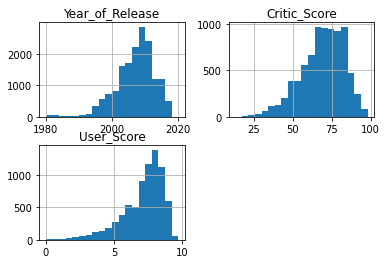

In [12]:
vg_sales_2016_w_scores.hist(column=['Year_of_Release','Genre','Critic_Score','User_Score','Rating'], bins=20)

array([<AxesSubplot:title={'center':'Year_of_Release'}>,
       <AxesSubplot:title={'center':'NA_Sales'}>,
       <AxesSubplot:title={'center':'EU_Sales'}>,
       <AxesSubplot:title={'center':'JP_Sales'}>,
       <AxesSubplot:title={'center':'Other_Sales'}>,
       <AxesSubplot:title={'center':'Global_Sales'}>,
       <AxesSubplot:title={'center':'Critic_Score'}>,
       <AxesSubplot:title={'center':'Critic_Count'}>,
       <AxesSubplot:title={'center':'User_Score'}>,
       <AxesSubplot:title={'center':'User_Count'}>], dtype=object)

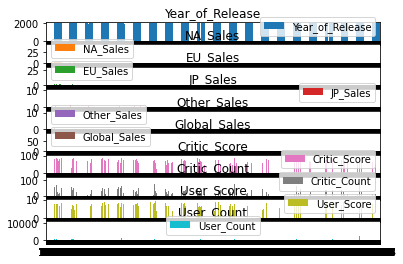

In [13]:
vg_sales_2016_w_scores.plot.bar(rot=0, subplots=True)

In [15]:
vg_2019_w_scores = pd.read_csv(r"C:\Users\ez\Desktop\Capstone2\csv_files\vgsales-12-4-2019.csv")
vg_2019_w_scores.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg


In [16]:
vg_2019_w_scores.describe()

,Rank,VGChartz_Score,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,status,Vgchartzscore
count,55792.000000,0.0,6536.000000,335.000000,1827.000000,19415.000000,12964.000000,13189.000000,7043.000000,15522.000000,54813.000000,55792.0,799.000000
mean,27896.500000,NaN,7.213709,8.253433,1.887258,0.365503,0.275541,0.155263,0.110402,0.044719,2005.659095,1.0,7.425907
std,16105.907446,NaN,1.454079,1.401489,4.195693,0.833022,0.512809,0.399257,0.184673,0.129554,8.355585,0.0,1.384226
min,1.000000,NaN,1.000000,2.000000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,1970.000000,1.0,2.600000
25%,13948.750000,NaN,6.400000,7.800000,0.200000,0.030000,0.050000,0.010000,0.020000,0.000000,2000.000000,1.0,6.800000
50%,27896.500000,NaN,7.500000,8.500000,0.590000,0.120000,0.120000,0.040000,0.050000,0.010000,2008.000000,1.0,7.800000
75%,41844.250000,NaN,8.300000,9.100000,1.800000,0.360000,0.290000,0.140000,0.120000,0.040000,2011.000000,1.0,8.500000
max,55792.000000,NaN,10.000000,10.000000,82.860000,20.320000,9.760000,9.850000,2.690000,3.120000,2020.000000,1.0,9.600000


In [18]:
#VGChartz_Score column is empty
vg_2019_w_scores.drop(columns = 'VGChartz_Score', inplace=True)
vg_2019_w_scores.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg
